In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

In [ ]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_drawing = x_train

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
image_size = 784
x_train = x_train.reshape(x_train.shape[0], image_size)
x_test = x_test.reshape(x_test.shape[0],image_size)

print("After reshaping")
print("X_train Shape", x_train.shape)
print("X_test Shape", x_test.shape)

After reshaping
X_train Shape (60000, 784)
X_test Shape (10000, 784)


In [ ]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [ ]:
print(y_train.shape)
print(y_train[0])

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


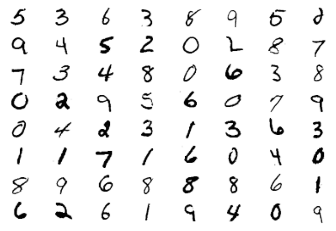

In [ ]:
for i in range(64) :
  ax = plt.subplot(8,8,i+1)
  ax.axis('off')
  plt.imshow(x_train_drawing[randint(0,x_train.shape[0])],cmap = 'Greys')

In [ ]:
model = Sequential()

model.add(Dense( units= 2048, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              1607680   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________


# Stochastic Gradient Descent

In [ ]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs = 50, verbose=2, validation_split=.1)

Epoch 1/50
422/422 - 10s - loss: 0.2177 - accuracy: 0.9416 - val_loss: 0.1867 - val_accuracy: 0.9513
Epoch 2/50
422/422 - 9s - loss: 0.1806 - accuracy: 0.9524 - val_loss: 0.1690 - val_accuracy: 0.9572
Epoch 3/50
422/422 - 9s - loss: 0.1541 - accuracy: 0.9610 - val_loss: 0.1541 - val_accuracy: 0.9587
Epoch 4/50
422/422 - 9s - loss: 0.1326 - accuracy: 0.9676 - val_loss: 0.1457 - val_accuracy: 0.9607
Epoch 5/50
422/422 - 9s - loss: 0.1158 - accuracy: 0.9730 - val_loss: 0.1396 - val_accuracy: 0.9628
Epoch 6/50
422/422 - 9s - loss: 0.1009 - accuracy: 0.9781 - val_loss: 0.1339 - val_accuracy: 0.9640
Epoch 7/50
422/422 - 9s - loss: 0.0890 - accuracy: 0.9814 - val_loss: 0.1307 - val_accuracy: 0.9650
Epoch 8/50
422/422 - 9s - loss: 0.0794 - accuracy: 0.9852 - val_loss: 0.1259 - val_accuracy: 0.9652
Epoch 9/50
422/422 - 9s - loss: 0.0707 - accuracy: 0.9874 - val_loss: 0.1247 - val_accuracy: 0.9672
Epoch 10/50
422/422 - 9s - loss: 0.0634 - accuracy: 0.9896 - val_loss: 0.1205 - val_accuracy: 0.967

313/313 [==============================] - 2s 5ms/step - loss: 0.1182 - accuracy: 0.9653


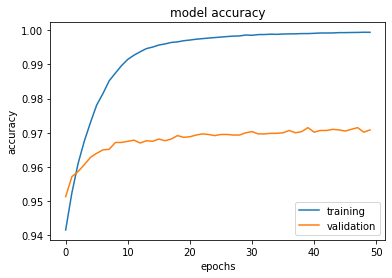

In [ ]:
loss, accuracy = model.evaluate(x_test,y_test, verbose=True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training', 'validation'],loc='best')
plt.show()

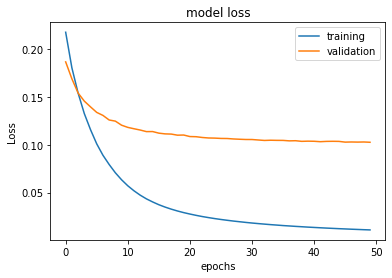

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['training', 'validation'],loc='best')
plt.show()

#RMS Prop

In [ ]:
model_2 = Sequential()

model_2.add(Dense( units= 2048, activation='sigmoid', input_shape=(image_size,)))
model_2.add(Dense(units=num_classes,activation='softmax'))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.compile(optimizer = 'RMSprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model_2.fit(x_train, y_train, batch_size=128, epochs = 50, verbose=2, validation_split=.1)

Epoch 1/50
422/422 - 13s - loss: 0.3438 - accuracy: 0.8985 - val_loss: 0.1901 - val_accuracy: 0.9427
Epoch 2/50
422/422 - 12s - loss: 0.1914 - accuracy: 0.9426 - val_loss: 0.1492 - val_accuracy: 0.9542
Epoch 3/50
422/422 - 12s - loss: 0.1598 - accuracy: 0.9521 - val_loss: 0.1231 - val_accuracy: 0.9648
Epoch 4/50
422/422 - 12s - loss: 0.1396 - accuracy: 0.9577 - val_loss: 0.1165 - val_accuracy: 0.9642
Epoch 5/50
422/422 - 12s - loss: 0.1259 - accuracy: 0.9619 - val_loss: 0.1078 - val_accuracy: 0.9692
Epoch 6/50
422/422 - 12s - loss: 0.1187 - accuracy: 0.9643 - val_loss: 0.0974 - val_accuracy: 0.9717
Epoch 7/50
422/422 - 12s - loss: 0.1109 - accuracy: 0.9669 - val_loss: 0.1092 - val_accuracy: 0.9705
Epoch 8/50
422/422 - 12s - loss: 0.1069 - accuracy: 0.9675 - val_loss: 0.1270 - val_accuracy: 0.9643
Epoch 9/50
422/422 - 12s - loss: 0.1012 - accuracy: 0.9695 - val_loss: 0.1049 - val_accuracy: 0.9715
Epoch 10/50
422/422 - 12s - loss: 0.0992 - accuracy: 0.9705 - val_loss: 0.1119 - val_accura

313/313 [==============================] - 1s 5ms/step - loss: 0.1332 - accuracy: 0.9688


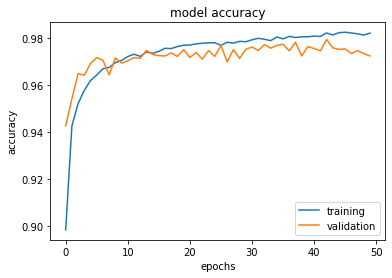

In [ ]:
loss, accuracy = model_2.evaluate(x_test,y_test, verbose=True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training', 'validation'],loc='best')
plt.show()

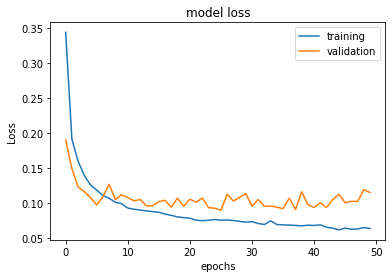

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['training', 'validation'],loc='best')
plt.show()

#Adam

In [ ]:
model_3 = Sequential()

model_3.add(Dense( units= 2048, activation='sigmoid', input_shape=(image_size,)))
model_3.add(Dense(units=num_classes,activation='softmax'))
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model_3.fit(x_train, y_train, batch_size=128, epochs = 50, verbose=2, validation_split=.1)

Epoch 1/50
422/422 - 11s - loss: 0.3205 - accuracy: 0.9086 - val_loss: 0.1876 - val_accuracy: 0.9537
Epoch 2/50
422/422 - 10s - loss: 0.2282 - accuracy: 0.9349 - val_loss: 0.1819 - val_accuracy: 0.9477
Epoch 3/50
422/422 - 10s - loss: 0.2063 - accuracy: 0.9412 - val_loss: 0.1672 - val_accuracy: 0.9582
Epoch 4/50
422/422 - 10s - loss: 0.1960 - accuracy: 0.9434 - val_loss: 0.1642 - val_accuracy: 0.9557
Epoch 5/50
422/422 - 10s - loss: 0.1823 - accuracy: 0.9462 - val_loss: 0.1723 - val_accuracy: 0.9478
Epoch 6/50
422/422 - 10s - loss: 0.1753 - accuracy: 0.9482 - val_loss: 0.1492 - val_accuracy: 0.9575
Epoch 7/50
422/422 - 10s - loss: 0.1617 - accuracy: 0.9524 - val_loss: 0.1373 - val_accuracy: 0.9630
Epoch 8/50
422/422 - 10s - loss: 0.1571 - accuracy: 0.9538 - val_loss: 0.1400 - val_accuracy: 0.9593
Epoch 9/50
422/422 - 10s - loss: 0.1585 - accuracy: 0.9527 - val_loss: 0.1393 - val_accuracy: 0.9593
Epoch 10/50
422/422 - 10s - loss: 0.1555 - accuracy: 0.9527 - val_loss: 0.1488 - val_accura

313/313 [==============================] - 1s 5ms/step - loss: 0.1332 - accuracy: 0.9688


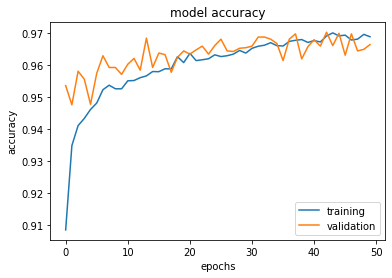

In [ ]:
loss, accuracy = model_2.evaluate(x_test,y_test, verbose=True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training', 'validation'],loc='best')
plt.show()

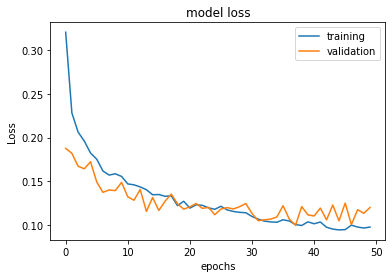

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['training', 'validation'],loc='best')
plt.show()

#Ada Grad

In [ ]:
model_4 = Sequential()

model_4.add(Dense( units= 2048, activation='sigmoid', input_shape=(image_size,)))
model_4.add(Dense(units=num_classes,activation='softmax'))
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.compile(optimizer = 'Adagrad', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model_4.fit(x_train, y_train, batch_size=128, epochs = 50, verbose=2, validation_split=.1)

Epoch 1/50
422/422 - 10s - loss: 0.7859 - accuracy: 0.7969 - val_loss: 0.4038 - val_accuracy: 0.9092
Epoch 2/50
422/422 - 10s - loss: 0.3996 - accuracy: 0.8993 - val_loss: 0.3102 - val_accuracy: 0.9262
Epoch 3/50
422/422 - 9s - loss: 0.3239 - accuracy: 0.9181 - val_loss: 0.2733 - val_accuracy: 0.9310
Epoch 4/50
422/422 - 9s - loss: 0.2818 - accuracy: 0.9294 - val_loss: 0.2513 - val_accuracy: 0.9360
Epoch 5/50
422/422 - 9s - loss: 0.2537 - accuracy: 0.9366 - val_loss: 0.2362 - val_accuracy: 0.9408
Epoch 6/50
422/422 - 9s - loss: 0.2328 - accuracy: 0.9427 - val_loss: 0.2255 - val_accuracy: 0.9417
Epoch 7/50
422/422 - 10s - loss: 0.2165 - accuracy: 0.9474 - val_loss: 0.2172 - val_accuracy: 0.9428
Epoch 8/50
422/422 - 10s - loss: 0.2032 - accuracy: 0.9514 - val_loss: 0.2101 - val_accuracy: 0.9445
Epoch 9/50
422/422 - 10s - loss: 0.1919 - accuracy: 0.9542 - val_loss: 0.2047 - val_accuracy: 0.9462
Epoch 10/50
422/422 - 10s - loss: 0.1824 - accuracy: 0.9570 - val_loss: 0.1996 - val_accuracy: 

313/313 [==============================] - 1s 5ms/step - loss: 0.1332 - accuracy: 0.9688


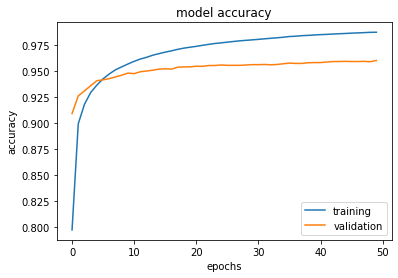

In [ ]:
loss, accuracy = model_2.evaluate(x_test,y_test, verbose=True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training', 'validation'],loc='best')
plt.show()

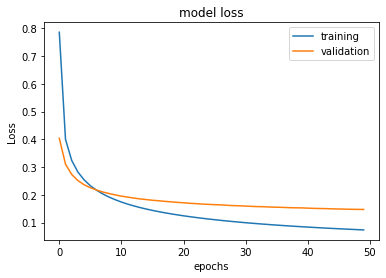

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['training', 'validation'],loc='best')
plt.show()